# clear the memory

In [1]:
rm(list = ls())

# make sure you install all R packages

In [2]:
ipak <- function(pkg){
  new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
  if (length(new.pkg))
    install.packages(new.pkg, dependencies = TRUE)
  sapply(pkg, require, character.only = TRUE)
}

packages <- c('tidyverse', 'fpp2', 'readr', 'dplyr', 'xts', 'ggplot2','astsa')

ipak(packages)

Loading required package: tidyverse

── Attaching packages ────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: fpp2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ───────────────────────────────────────────────────────────────────── fpp2 2.4 ──

✔ forecast  8.15     ✔ expsmooth 2.3 
✔ fma       2.4      



Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are ma

tidyverse      fpp2     readr     dplyr       xts   ggplot2     astsa 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

# load R packages

In [3]:
library(tidyverse)
library(fpp2)
library(readr)
library(dplyr)
library(astsa)
library(xts)
library(ggplot2)

# load data into R

In [4]:
data <- read_csv("/Users/ning/Documents/Working_Directory/Tex_MD/Teaching/tutorial/6003/W8/ausunemp.csv")

Rows: 355 Columns: 2

── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Month
dbl (1): Unemployment rate (percentage; source: ABS)


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



# check variable names

In [5]:
colnames(data)

[1] "Month"                                      
[2] "Unemployment rate (percentage; source: ABS)"

# rename your variable

In [6]:
names(data)[names(data) == "Unemployment rate (percentage; source: ABS)"] <- "Y"
data = as.matrix(na.omit(data))
data = na.omit(data)
data = data[ , c("Y")]

# transform it into a time series

In [8]:
data = ts(as.numeric(data), start=c(1960, 1), frequency=12)
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,6.7,7.1,6.5,6.3,6.5,6.4,6.7,7.0,7.3,7.1,7.4,8.1
1961,9.1,9.5,9.6,9.9,9.5,9.0,9.5,9.5,10.0,9.4,9.6,10.5
1962,11.2,11.5,10.9,10.5,10.6,10.5,10.6,10.4,10.6,10.4,10.5,11.2
1963,11.7,12.1,11.3,10.8,10.7,10.7,10.4,10.7,10.7,10.3,10.3,10.7
1964,11.4,11.5,10.8,10.1,9.7,9.5,9.1,9.2,9.3,8.6,8.6,8.9
1965,9.5,9.8,9.0,8.3,8.4,8.1,7.9,8.1,8.4,8.1,8.0,8.1
1966,9.1,9.2,8.8,8.7,8.4,8.0,8.0,8.5,8.6,8.3,8.0,8.5
1967,9.2,9.7,9.0,8.6,8.5,8.1,8.0,8.3,8.1,7.6,7.5,7.8
1968,8.5,8.6,8.2,7.6,7.7,7.6,7.4,7.5,7.6,6.9,7.2,7.0
1969,7.7,7.9,7.3,7.0,7.0,6.5,6.2,6.7,7.1,6.4,6.1,6.6


# check summary statistics

In [9]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.900   5.300   6.000   6.606   7.650  12.100 

# plot time serie

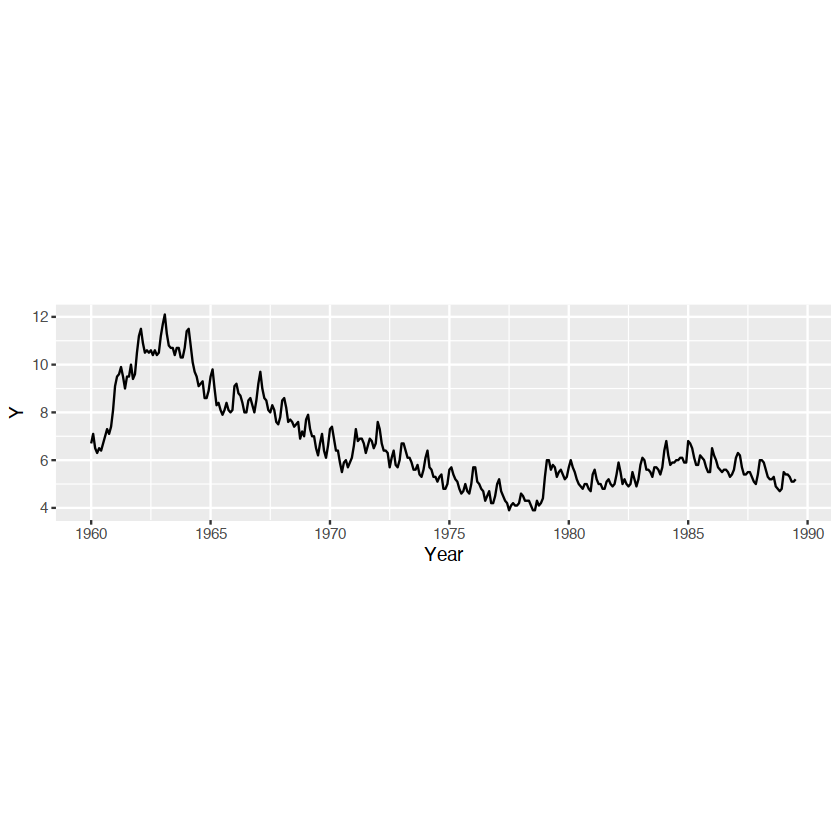

In [10]:
autoplot(data) + ylab("Y") + xlab("Year") + coord_fixed()

--- 

# Simple smoothing

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0,0.36,0.28,-0.22,4.3,0.48,0.21


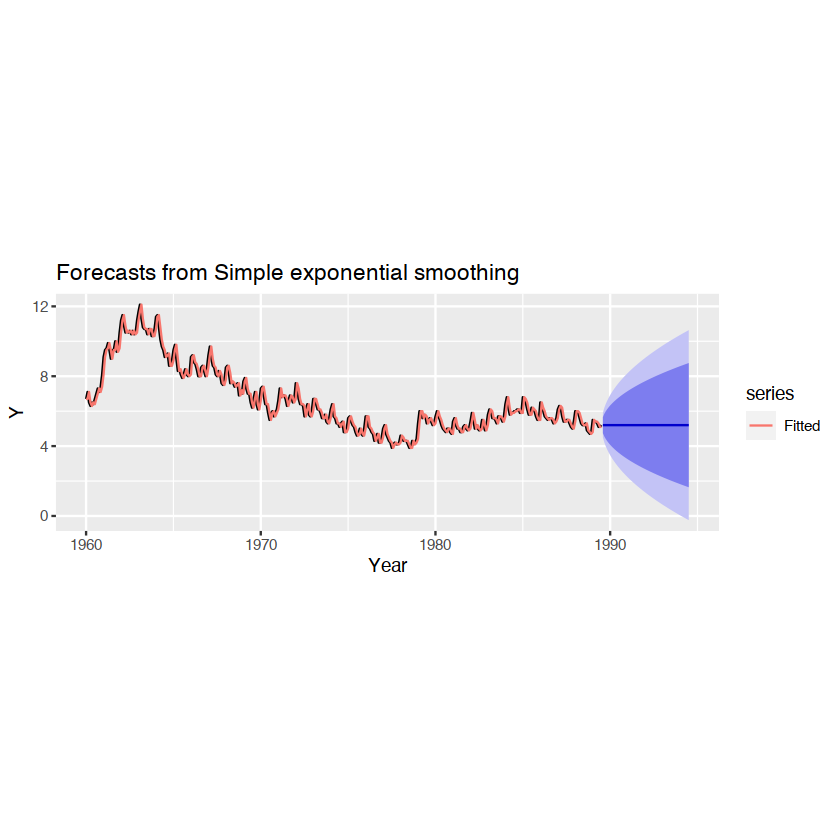

In [12]:
#train your model
ses.data <- ses(data, h = 60)
#round up the result to 2 decimal places
round(accuracy(ses.data),2)
#plot the result with forcast
autoplot(ses.data) +
  autolayer(fitted(ses.data), series="Fitted") +
  ylab("Y") + xlab("Year") + coord_fixed()

---

# Holt’s linear trend method

Holt's method 

Call:
 holt(y = data, h = 60) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.0178 

  Initial states:
    l = 7.0867 
    b = 0.084 

  sigma:  0.3627

     AIC     AICc      BIC 
1370.600 1370.772 1389.960 

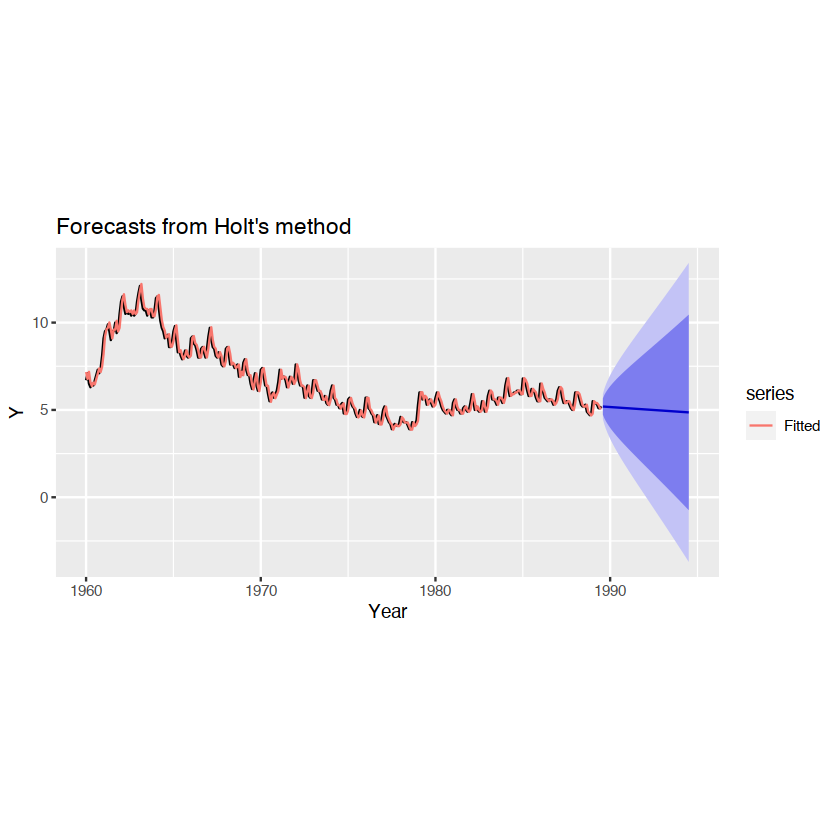

In [13]:
#train your model
holt.data <- holt(data, h = 60)
#check the result
holt.data$model
#plot the result with forcast
autoplot(holt.data) +
  autolayer(fitted(holt.data), series="Fitted") +
  ylab("Y") + xlab("Year") + coord_fixed()

## decompose your time serie into trend, seasonal and reminders

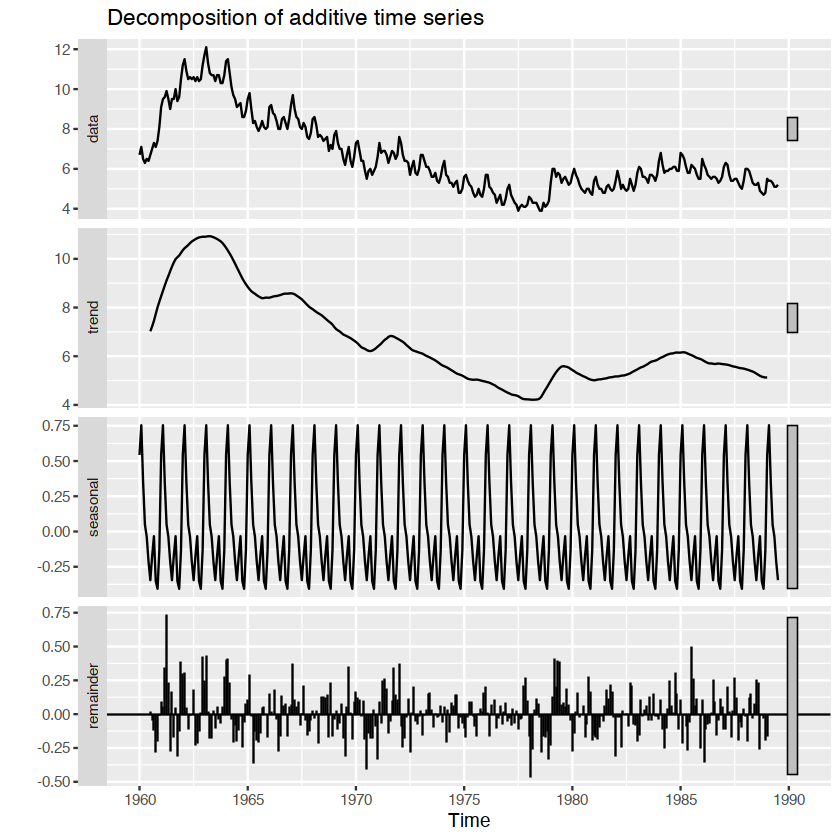

In [15]:
autoplot(decompose(data))

---

## additive smoothing

ETS(A,Ad,A) 

Call:
 ets(y = data, model = "AAA") 

  Smoothing parameters:
    alpha = 0.6316 
    beta  = 0.0448 
    gamma = 0.2262 
    phi   = 0.9431 

  Initial states:
    l = 5.6352 
    b = 0.2904 
    s = -0.086 -0.6448 -0.6607 -0.1032 -0.2272 -0.2895
           -0.3625 -0.0059 0.1337 0.464 1.0311 0.7511

  sigma:  0.2048

      AIC      AICc       BIC 
 977.4481  979.4839 1047.1463 

Training set error measures:
                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.01048586 0.1998725 0.1557237 -0.1263419 2.432982 0.2652096
                  ACF1
Training set 0.1195808

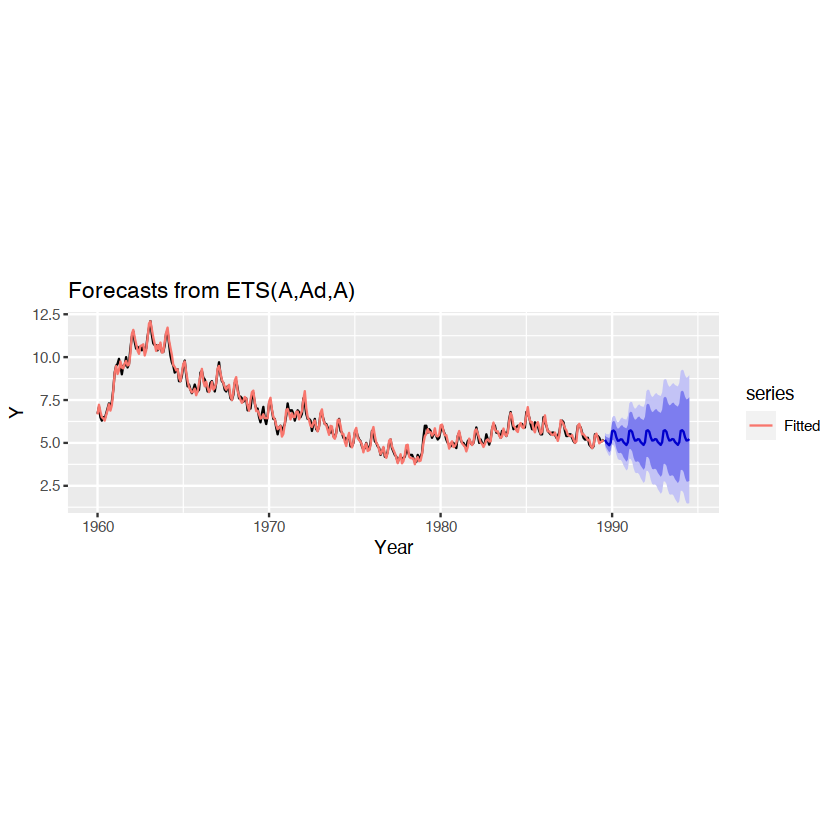


	Ljung-Box test

data:  Residuals from ETS(A,Ad,A)
Q* = 33.556, df = 7, p-value = 2.085e-05

Model df: 17.   Total lags used: 24



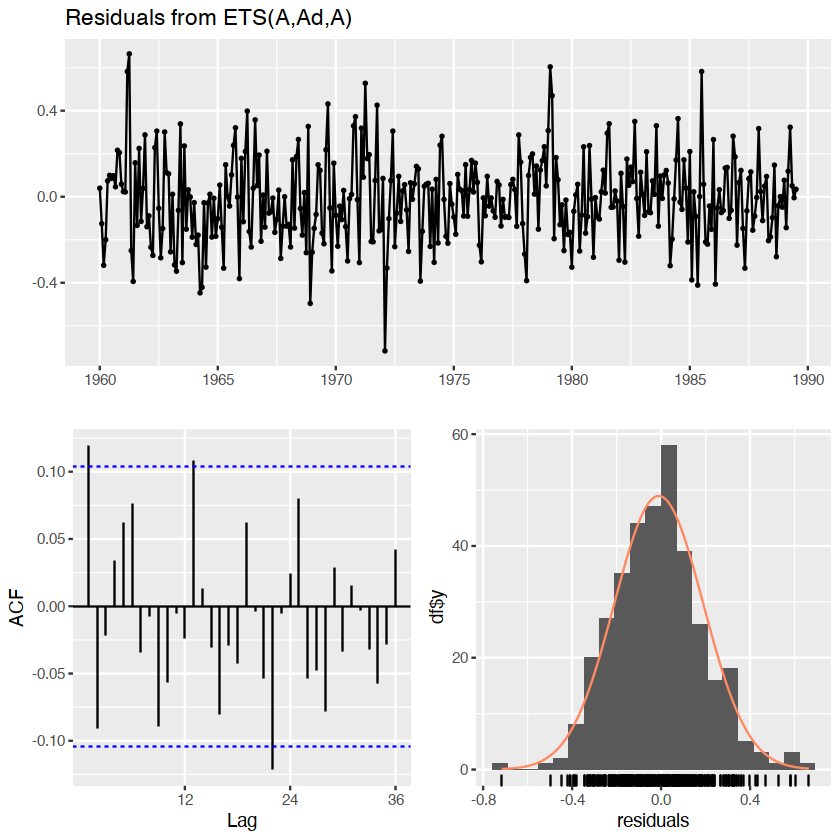

In [17]:
#train your model
data.hw <- ets(data, model = "AAA")
#plot the result with forcast
autoplot(forecast(data.hw, h=60))+
  autolayer(fitted(data.hw), series="Fitted") +
  ylab("Y") + xlab("Year") + coord_fixed()
#check the result
summary(data.hw)
#check the residual
checkresiduals(data.hw)

---
## multiplicative smoothing

ETS(M,Ad,M) 

Call:
 ets(y = data, model = "MAM") 

  Smoothing parameters:
    alpha = 0.7068 
    beta  = 0.0285 
    gamma = 0.1944 
    phi   = 0.9521 

  Initial states:
    l = 5.9475 
    b = 0.2133 
    s = 1.0096 0.9442 0.9381 0.9883 0.9728 0.952
           0.9424 0.9835 1.0047 1.0502 1.1187 1.0957

  sigma:  0.0321

      AIC      AICc       BIC 
 976.1494  978.1851 1045.8475 

Training set error measures:
                      ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.01144862 0.2027063 0.1556766 -0.1754254 2.410807 0.2651295
                   ACF1
Training set 0.07545767

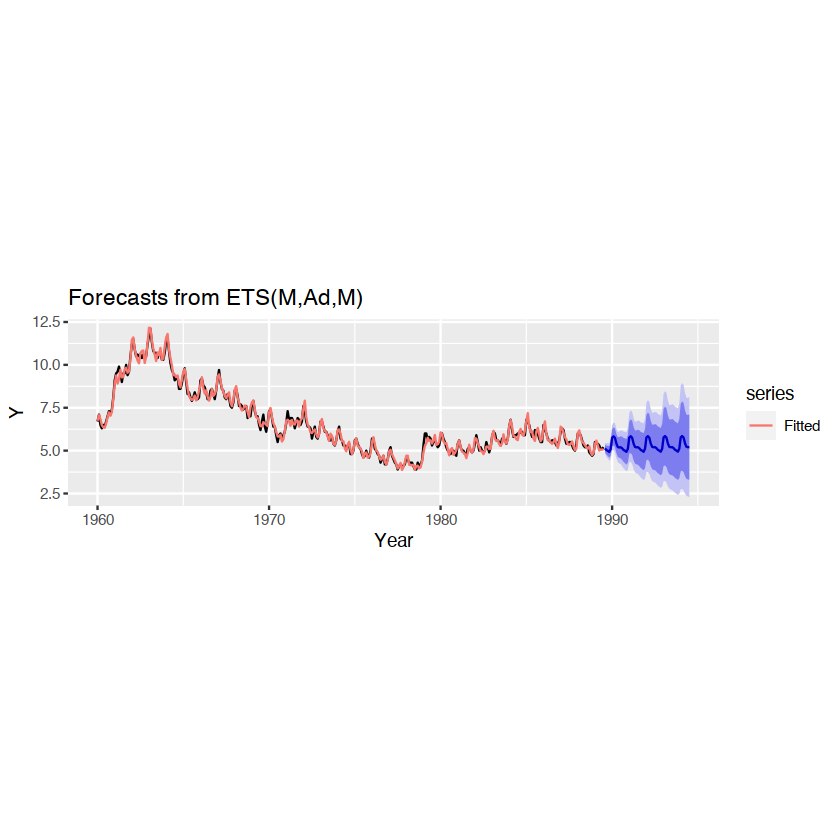


	Ljung-Box test

data:  Residuals from ETS(M,Ad,M)
Q* = 42.879, df = 7, p-value = 3.52e-07

Model df: 17.   Total lags used: 24



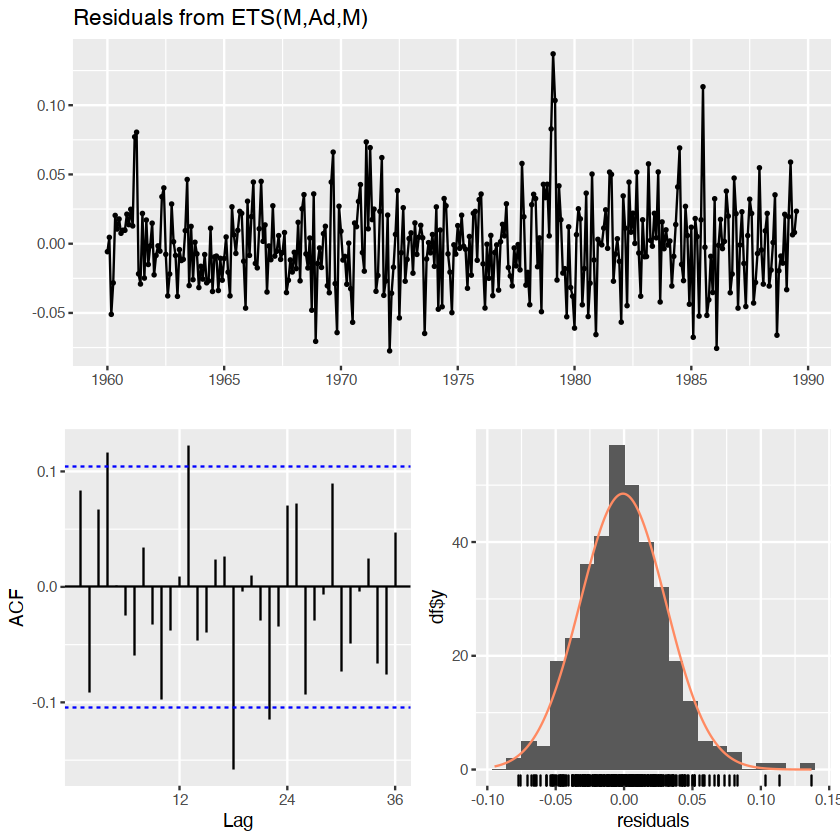

In [18]:
#train your model
data.hw2 <- ets(data, model = "MAM")
#plot the result with forcast
autoplot(forecast(data.hw2, h=60))+
  autolayer(fitted(data.hw2), series="Fitted") +
  ylab("Y") + xlab("Year") + coord_fixed()
#check the result
summary(data.hw2)
#check the residual
checkresiduals(data.hw2)

---
# Holt Winters Seasonal smoothing

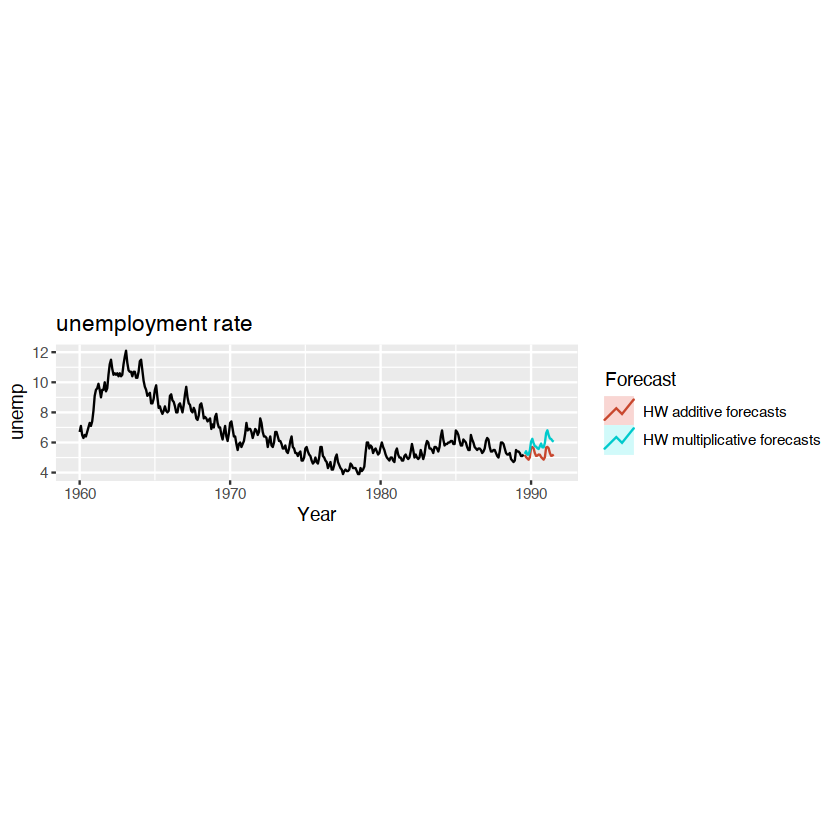

In [19]:
#train your model : additive vs multiplicative
fit1 <- hw(data,seasonal="additive")
fit2 <- hw(data,seasonal="multiplicative")
#plot the result with forcast
autoplot(data) +
  autolayer(fit1, series="HW additive forecasts", PI=FALSE) +
  autolayer(fit2, series="HW multiplicative forecasts",
    PI=FALSE) +
  xlab("Year") +
  ylab("unemp") +
  ggtitle("unemployment rate") +
  guides(colour=guide_legend(title="Forecast")) + 
  coord_fixed()

---
# Holt Winters Seasonal smoothing with damping

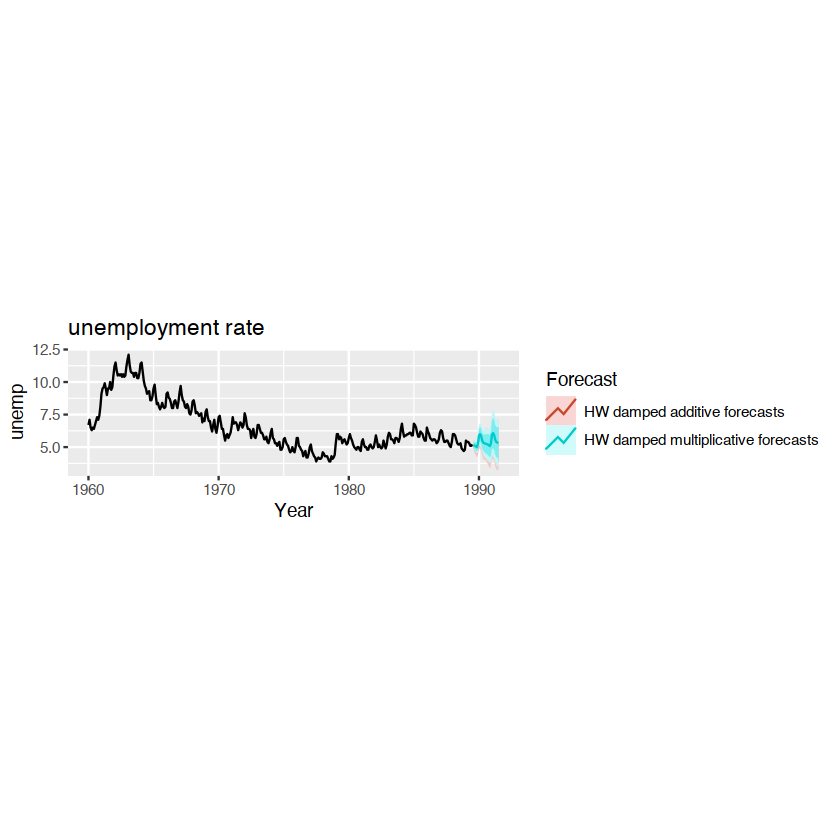

In [20]:
#train your model : additive vs multiplicative
fit3 <- hw(data,damped=TRUE,seasonal="additive")
fit4 <- hw(data,damped=TRUE,seasonal="multiplicative")
#plot the result with forcast
autoplot(data) +
  autolayer(fit3, series="HW damped additive forecasts", PI=TRUE) +
  autolayer(fit4, series="HW damped multiplicative forecasts",
    PI=TRUE) +
  xlab("Year") +
  ylab("unemp") +
  ggtitle("unemployment rate") +
  guides(colour=guide_legend(title="Forecast")) + 
  coord_fixed()